Проект по НИС, "Investment Activity in a Crisis"

In [1]:
#импортируем все необходимые библиотеки
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#устанавливаем стиль и шрифт для графиков
plt.style.use("bmh")
plt.rcParams['font.family'] = 'DejaVu Sans'

#игнорируем предупреждения
import warnings
warnings.filterwarnings('ignore')

In [2]:
#считываем данные из датасета
data = pd.read_excel('JSTdatasetR6.xlsx')
data

,year,country,iso,ifs,pop,rgdpmad,rgdpbarro,rconsbarro,gdp,iy,...,eq_capgain,eq_dp,eq_capgain_interp,eq_tr_interp,eq_dp_interp,bond_rate,eq_div_rtn,capital_tr,risky_tr,safe_tr
0,1870,Australia,AUS,193,1775.000000,3273.239437,13.836157,21.449734,208.78,0.109266,...,-0.070045,0.071417,NaN,NaN,NaN,0.049118,0.066415,NaN,NaN,NaN
1,1871,Australia,AUS,193,1675.000000,3298.507463,13.936864,19.930801,211.56,0.104579,...,0.041654,0.065466,NaN,NaN,NaN,0.048446,0.068193,NaN,NaN,NaN
2,1872,Australia,AUS,193,1722.000000,3553.426249,15.044247,21.085006,227.40,0.130438,...,0.108945,0.062997,NaN,NaN,NaN,0.047373,0.069861,NaN,NaN,NaN
3,1873,Australia,AUS,193,1769.000000,3823.629169,16.219443,23.254910,266.54,0.124986,...,0.083086,0.064484,NaN,NaN,NaN,0.046720,0.069842,NaN,NaN,NaN
4,1874,Australia,AUS,193,1822.000000,3834.796926,16.268228,23.458050,287.58,0.141960,...,0.119389,0.063503,NaN,NaN,NaN,0.046533,0.071085,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2713,2016,USA,USA,111,322701.246359,33012.767871,108.756035,108.051774,18695.10,0.195831,...,0.014868,0.021309,NaN,NaN,NaN,0.018417,0.021626,0.048536,0.067177,0.003139
2714,2017,USA,USA,111,324756.935396,33543.679862,110.591099,109.978043,19479.60,0.204547,...,0.170363,0.019363,NaN,NaN,NaN,0.023300,0.022662,0.121381,0.160881,0.017584
2715,2018,USA,USA,111,326497.132575,34338.770756,113.306861,112.567306,20527.20,0.208586,...,0.121093,0.018716,NaN,NaN,NaN,0.029100,0.020982,0.092210,0.129585,0.000581
2716,2019,USA,USA,111,328018.681916,34961.835051,115.229692,114.509455,21372.60,0.210205,...,0.061144,0.019312,NaN,NaN,NaN,0.021442,0.020492,0.080606,0.084776,0.070134


In [3]:
#теперь начнем преобразовывать таблицу для большей наглядности

#удалим столбец "iso", потому что вся необходимая информация о стране содержится в столбце "country"
#также удалим столбцы с очень маленьким количеством значений в них, так как они не репрезентативны
data = data.drop(columns = ['iso', 'eq_capgain_interp', 'eq_tr_interp', 'eq_dp_interp', 'rent_ipolated', 'housing_capgain_ipolated', 'crisisJST_old'])
data

,year,country,ifs,pop,rgdpmad,rgdpbarro,rconsbarro,gdp,iy,cpi,...,housing_capgain,housing_rent_rtn,housing_rent_yd,eq_capgain,eq_dp,bond_rate,eq_div_rtn,capital_tr,risky_tr,safe_tr
0,1870,Australia,193,1775.000000,3273.239437,13.836157,21.449734,208.78,0.109266,2.708333,...,NaN,NaN,NaN,-0.070045,0.071417,0.049118,0.066415,NaN,NaN,NaN
1,1871,Australia,193,1675.000000,3298.507463,13.936864,19.930801,211.56,0.104579,2.666667,...,-0.045456,NaN,NaN,0.041654,0.065466,0.048446,0.068193,NaN,NaN,NaN
2,1872,Australia,193,1722.000000,3553.426249,15.044247,21.085006,227.40,0.130438,2.541667,...,0.031747,NaN,NaN,0.108945,0.062997,0.047373,0.069861,NaN,NaN,NaN
3,1873,Australia,193,1769.000000,3823.629169,16.219443,23.254910,266.54,0.124986,2.541667,...,-0.030770,NaN,NaN,0.083086,0.064484,0.046720,0.069842,NaN,NaN,NaN
4,1874,Australia,193,1822.000000,3834.796926,16.268228,23.458050,287.58,0.141960,2.666667,...,0.206350,NaN,NaN,0.119389,0.063503,0.046533,0.071085,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2713,2016,USA,111,322701.246359,33012.767871,108.756035,108.051774,18695.10,0.195831,178.575038,...,0.058300,0.049627,0.046894,0.014868,0.021309,0.018417,0.021626,0.048536,0.067177,0.003139
2714,2017,USA,111,324756.935396,33543.679862,110.591099,109.978043,19479.60,0.204547,182.415361,...,0.064388,0.048682,0.045737,0.170363,0.019363,0.023300,0.022662,0.121381,0.160881,0.017584
2715,2018,USA,111,326497.132575,34338.770756,113.306861,112.567306,20527.20,0.208586,186.862052,...,0.065539,0.047392,0.044477,0.121093,0.018716,0.029100,0.020982,0.092210,0.129585,0.000581
2716,2019,USA,111,328018.681916,34961.835051,115.229692,114.509455,21372.60,0.210205,190.247600,...,0.043160,0.046125,0.044217,0.061144,0.019312,0.021442,0.020492,0.080606,0.084776,0.070134


In [4]:
#также заметим, что данных для Ирландии очень мало, поэтому тоже удалим ее из нашего датафрейма
data = data[data['country'] != 'Ireland']
data

,year,country,ifs,pop,rgdpmad,rgdpbarro,rconsbarro,gdp,iy,cpi,...,housing_capgain,housing_rent_rtn,housing_rent_yd,eq_capgain,eq_dp,bond_rate,eq_div_rtn,capital_tr,risky_tr,safe_tr
0,1870,Australia,193,1775.000000,3273.239437,13.836157,21.449734,208.78,0.109266,2.708333,...,NaN,NaN,NaN,-0.070045,0.071417,0.049118,0.066415,NaN,NaN,NaN
1,1871,Australia,193,1675.000000,3298.507463,13.936864,19.930801,211.56,0.104579,2.666667,...,-0.045456,NaN,NaN,0.041654,0.065466,0.048446,0.068193,NaN,NaN,NaN
2,1872,Australia,193,1722.000000,3553.426249,15.044247,21.085006,227.40,0.130438,2.541667,...,0.031747,NaN,NaN,0.108945,0.062997,0.047373,0.069861,NaN,NaN,NaN
3,1873,Australia,193,1769.000000,3823.629169,16.219443,23.254910,266.54,0.124986,2.541667,...,-0.030770,NaN,NaN,0.083086,0.064484,0.046720,0.069842,NaN,NaN,NaN
4,1874,Australia,193,1822.000000,3834.796926,16.268228,23.458050,287.58,0.141960,2.666667,...,0.206350,NaN,NaN,0.119389,0.063503,0.046533,0.071085,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2713,2016,USA,111,322701.246359,33012.767871,108.756035,108.051774,18695.10,0.195831,178.575038,...,0.058300,0.049627,0.046894,0.014868,0.021309,0.018417,0.021626,0.048536,0.067177,0.003139
2714,2017,USA,111,324756.935396,33543.679862,110.591099,109.978043,19479.60,0.204547,182.415361,...,0.064388,0.048682,0.045737,0.170363,0.019363,0.023300,0.022662,0.121381,0.160881,0.017584
2715,2018,USA,111,326497.132575,34338.770756,113.306861,112.567306,20527.20,0.208586,186.862052,...,0.065539,0.047392,0.044477,0.121093,0.018716,0.029100,0.020982,0.092210,0.129585,0.000581
2716,2019,USA,111,328018.681916,34961.835051,115.229692,114.509455,21372.60,0.210205,190.247600,...,0.043160,0.046125,0.044217,0.061144,0.019312,0.021442,0.020492,0.080606,0.084776,0.070134


In [5]:
#округлим все значения до двух знаком после запятой для большей читаемости
data = data.round(2)
data

,year,country,ifs,pop,rgdpmad,rgdpbarro,rconsbarro,gdp,iy,cpi,...,housing_capgain,housing_rent_rtn,housing_rent_yd,eq_capgain,eq_dp,bond_rate,eq_div_rtn,capital_tr,risky_tr,safe_tr
0,1870,Australia,193,1775.00,3273.24,13.84,21.45,208.78,0.11,2.71,...,NaN,NaN,NaN,-0.07,0.07,0.05,0.07,NaN,NaN,NaN
1,1871,Australia,193,1675.00,3298.51,13.94,19.93,211.56,0.10,2.67,...,-0.05,NaN,NaN,0.04,0.07,0.05,0.07,NaN,NaN,NaN
2,1872,Australia,193,1722.00,3553.43,15.04,21.09,227.40,0.13,2.54,...,0.03,NaN,NaN,0.11,0.06,0.05,0.07,NaN,NaN,NaN
3,1873,Australia,193,1769.00,3823.63,16.22,23.25,266.54,0.12,2.54,...,-0.03,NaN,NaN,0.08,0.06,0.05,0.07,NaN,NaN,NaN
4,1874,Australia,193,1822.00,3834.80,16.27,23.46,287.58,0.14,2.67,...,0.21,NaN,NaN,0.12,0.06,0.05,0.07,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2713,2016,USA,111,322701.25,33012.77,108.76,108.05,18695.10,0.20,178.58,...,0.06,0.05,0.05,0.01,0.02,0.02,0.02,0.05,0.07,0.00
2714,2017,USA,111,324756.94,33543.68,110.59,109.98,19479.60,0.20,182.42,...,0.06,0.05,0.05,0.17,0.02,0.02,0.02,0.12,0.16,0.02
2715,2018,USA,111,326497.13,34338.77,113.31,112.57,20527.20,0.21,186.86,...,0.07,0.05,0.04,0.12,0.02,0.03,0.02,0.09,0.13,0.00
2716,2019,USA,111,328018.68,34961.84,115.23,114.51,21372.60,0.21,190.25,...,0.04,0.05,0.04,0.06,0.02,0.02,0.02,0.08,0.08,0.07


In [6]:
#посмотрим описание таблички
data.describe()

,year,ifs,pop,rgdpmad,rgdpbarro,rconsbarro,gdp,iy,cpi,ca,...,housing_capgain,housing_rent_rtn,housing_rent_yd,eq_capgain,eq_dp,bond_rate,eq_div_rtn,capital_tr,risky_tr,safe_tr
count,2567.000000,2567.000000,2567.000000,2567.000000,2567.000000,2478.000000,2.542000e+03,2347.000000,2567.000000,2.406000e+03,...,2045.000000,1909.000000,1921.000000,2.170000e+03,2169.000000,2381.000000,2163.000000,1830.000000,1854.000000,2247.000000
mean,1945.000000,146.588235,32531.692423,9034.462384,39.769926,41.844479,2.548826e+06,0.187806,41.262762,-4.725991e+04,...,0.060895,0.054327,0.051910,1.167935e+06,0.040798,0.054406,0.042797,0.099273,0.111467,0.051638
std,43.597482,23.738588,46443.209392,7810.134286,33.834475,32.326118,1.646002e+07,0.064087,56.495923,7.801056e+05,...,0.148394,0.020749,0.020293,5.440622e+07,0.017258,0.031518,0.017932,0.090395,0.110370,0.048322
min,1870.000000,111.000000,1675.000000,737.380000,3.260000,4.070000,0.000000e+00,0.020000,0.000000,-1.687900e+07,...,-0.310000,0.000000,0.000000,-8.800000e-01,0.000000,-0.040000,0.000000,-0.230000,-0.240000,-0.150000
25%,1907.000000,132.000000,5134.795000,2821.940000,12.690000,15.392500,3.793000e+01,0.140000,2.410000,-5.887500e+01,...,0.000000,0.040000,0.040000,-5.750000e-02,0.030000,0.040000,0.030000,0.050000,0.050000,0.020000
50%,1945.000000,142.000000,10750.840000,5429.510000,22.900000,27.570000,1.800275e+03,0.190000,10.460000,-2.500000e-02,...,0.050000,0.050000,0.050000,4.000000e-02,0.040000,0.050000,0.040000,0.090000,0.100000,0.040000
75%,1983.000000,158.000000,46061.500000,14523.570000,65.950000,68.602500,5.048390e+04,0.230000,73.585000,1.780000e+01,...,0.100000,0.070000,0.060000,1.600000e-01,0.050000,0.060000,0.050000,0.140000,0.160000,0.070000
max,2020.000000,193.000000,329239.720000,34961.840000,122.710000,120.430000,2.070466e+08,0.390000,226.830000,5.885998e+06,...,2.880000,0.130000,0.130000,2.534419e+09,0.130000,0.240000,0.140000,1.140000,1.280000,0.410000


In [7]:
#посмотрим, сколько и какие страны представлены в датасете
unique_values = data['country'].unique()
print(len(unique_values))
print(unique_values)

17
['Australia' 'Belgium' 'Canada' 'Switzerland' 'Germany' 'Denmark' 'Spain'
 'Finland' 'France' 'UK' 'Italy' 'Japan' 'Netherlands' 'Norway' 'Portugal'
 'Sweden' 'USA']


Теперь будем рисовать графики для отображения и анализа данных

1) Графики-бары для каждой страны - "ВВП по ППС на душу населения по годам"

In [8]:
#по оси икс расположены года, по оси игрек значением ВВП на душу населения по паритету покупательной способности

#импортируем библиотеку для добавления кнопки
from ipywidgets import interact, widgets

def plot_gdp(selected_country):
    df_selected = data[data['country'] == selected_country]

    plt.figure(figsize=(10, 6))
    plt.bar(df_selected['year'], df_selected['rgdpmad'], color='skyblue')
    plt.xlabel('Year')
    plt.ylabel('rgdpmad')
    plt.title(f'Real GDP per capita (PPP) for {selected_country}')
    plt.ylim(0, data['rgdpmad'].max()) 
    plt.show()

#сделаем кнопку, с помощью которой будем выбирать для какоц страны отобразить график
unique_values = data['country'].unique()
country_dropdown = widgets.Dropdown(options=unique_values, description='Select')

#соединим кнопку и построение графика
interact(plot_gdp, selected_country=country_dropdown)


interactive(children=(Dropdown(description='Select', options=('Australia', 'Belgium', 'Canada', 'Switzerland',…

<function __main__.plot_gdp(selected_country)>

2) График-пай - "Отображение доли экспорта и импорта для каждой страны"

In [9]:
#импортируем библиотеку для добавления кнопки
from ipywidgets import interact, widgets

#группируем данные по странам и суммируем значения exports и imports
grouped_data = data.groupby('country')[['exports', 'imports']].sum()

def plot_pie(country):
    data = grouped_data.loc[country]
    labels = ['Exports', 'Imports']
    sizes = [data['exports'], data['imports']]
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f'Export and Import distribution for {country}')
    plt.show()

#сделаем кнопку, с помощью которой будем выбирать для какоц страны отобразить график
country_dropdown = widgets.Dropdown(
    options=grouped_data.index,
    description='Select',
    disabled=False,
)

#соединим кнопку и построение графика
interact(plot_pie, country=country_dropdown)




interactive(children=(Dropdown(description='Select', options=('Australia', 'Belgium', 'Canada', 'Denmark', 'Fi…

<function __main__.plot_pie(country)>

3) Точечный график - "Зависимость размера ВВП и показателя отношения инвестиций к ВВП"

In [10]:
#импортируем библиотеку для добавления кнопки
from ipywidgets import interact, widgets

#нам нужны два столбца со значениями ВВП и показатель отношения инвестиций к ВВП
x_variable = 'rgdpmad'  
y_variable = 'iy'       

unique_countries = data['country'].unique()

def update_scatter_plot(selected_country):
    data_country = data[data['country'] == selected_country]

    plt.figure(figsize=(8, 6))
    plt.scatter(data_country[x_variable], data_country[y_variable], s=30, label=selected_country, color='red')
    plt.title(f'Scatter Plot: {x_variable} vs {y_variable} for {selected_country}')
    plt.xlabel(x_variable)
    plt.ylabel(y_variable)
    plt.legend()
    plt.grid(True)
    plt.show()

#сделаем кнопку, с помощью которой будем выбирать для какоц страны отобразить график
country_dropdown = widgets.Dropdown(
    options=unique_countries,
    value=unique_countries[0], 
    description='Select',
    disabled=False,
)

#соединим кнопку и построение графика
interact(update_scatter_plot, selected_country=country_dropdown)



interactive(children=(Dropdown(description='Select', options=('Australia', 'Belgium', 'Canada', 'Switzerland',…

<function __main__.update_scatter_plot(selected_country)>

Казалось бы, чем больше ВВП, тем больше должно быть инвестиций, но видим, что эта зависимость не соблюдается

4) Бокс-плот (ящик с усами) для показателя отношения инвестиций к ВВП для каждой страны

In [11]:
#импортируем библиотеку для добавления кнопки
from ipywidgets import interact, widgets


#возьмем только непустые клетки в столбце iy 
df_filtered = data.dropna(subset=['iy'])

#uруппируем данные по странам
grouped = df_filtered.groupby('country')

def plot_boxplot(country):
    plt.figure(figsize=(10, 6))
    plt.boxplot(grouped.get_group(country)['iy'])
    plt.title(f'Investment-to-GDP ratio for {country}')
    plt.ylabel('Iy')
    plt.show()

unique_countries = data['country'].unique()

# Создаем интерактивную кнопку для выбора страны
interact(plot_boxplot, country=widgets.Dropdown(options=unique_countries, description='Select'));

interactive(children=(Dropdown(description='Select', options=('Australia', 'Belgium', 'Canada', 'Switzerland',…

Немного анализа: 
Красная линия - это медианное значени iy (отношение инвестиций к ВВП);

Коробка (межквартильный размах, IQR) представляет собой разницу между 25-м и 75-м процентилями данных. Она включает в себя средние 50% данных;

Усы представляют собой диапазон данных в 1.5 раза выше и ниже межквартильного размаха. А любые точки данных за пределами этого диапазона считаются потенциальными выбросами


5) График-бар для каждой страны - "Показатель отношения инвестиций к ВВП по годам"

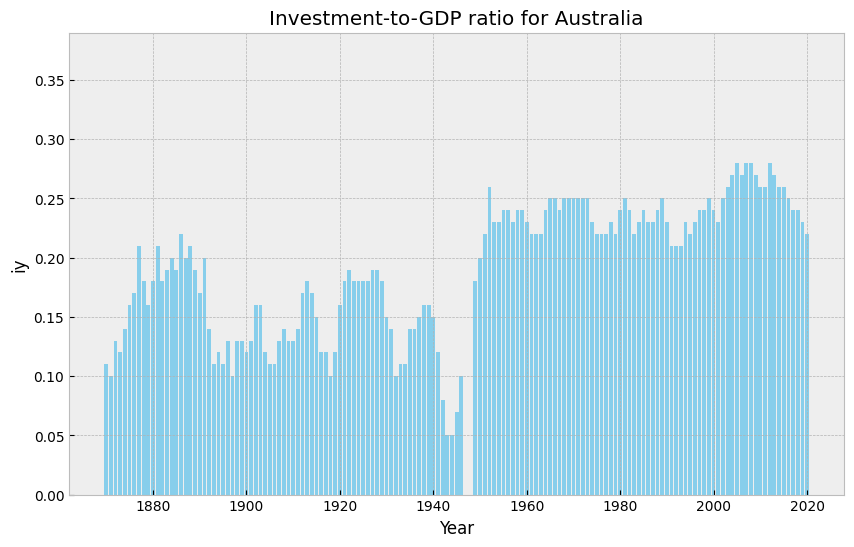

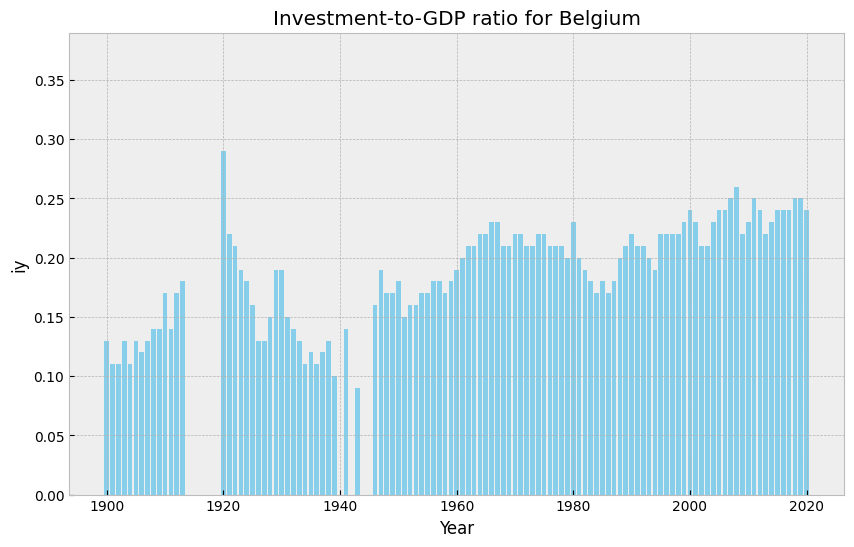

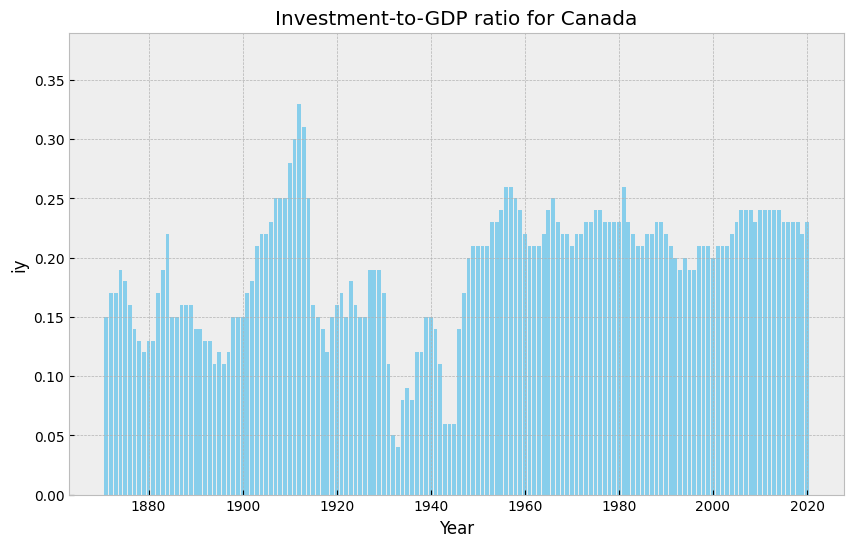

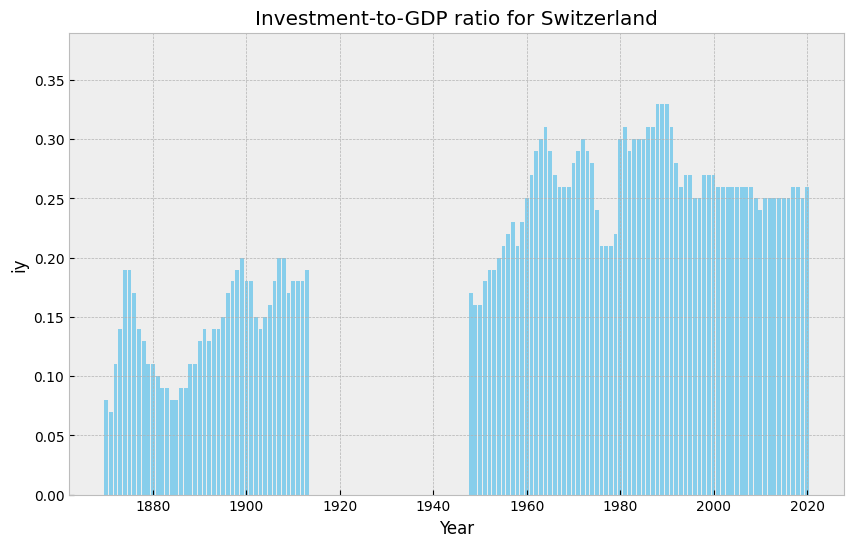

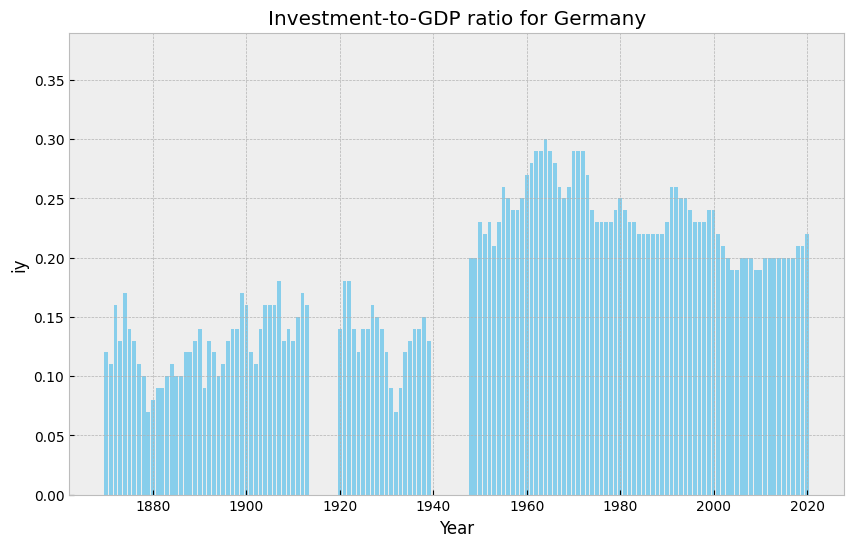

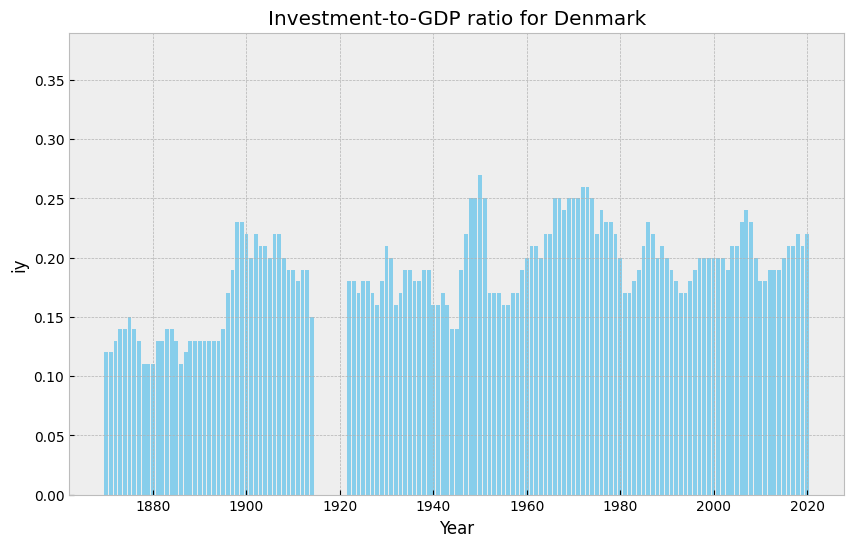

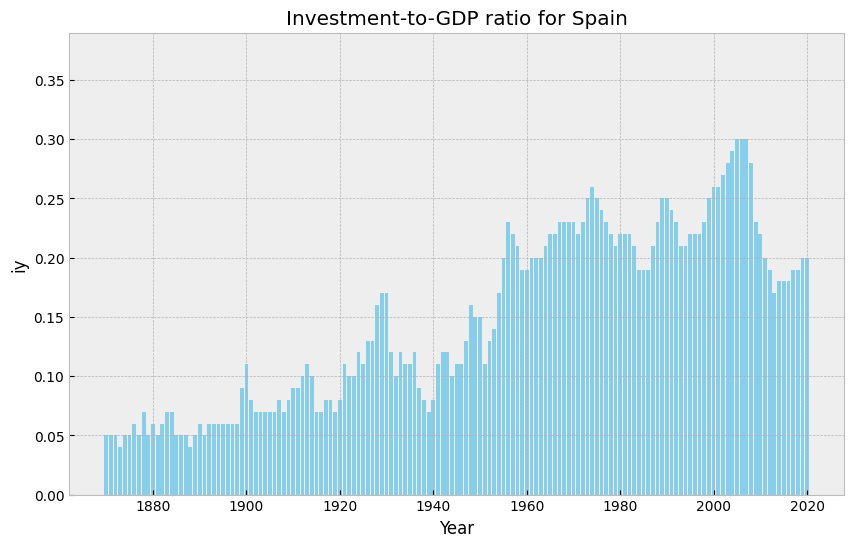

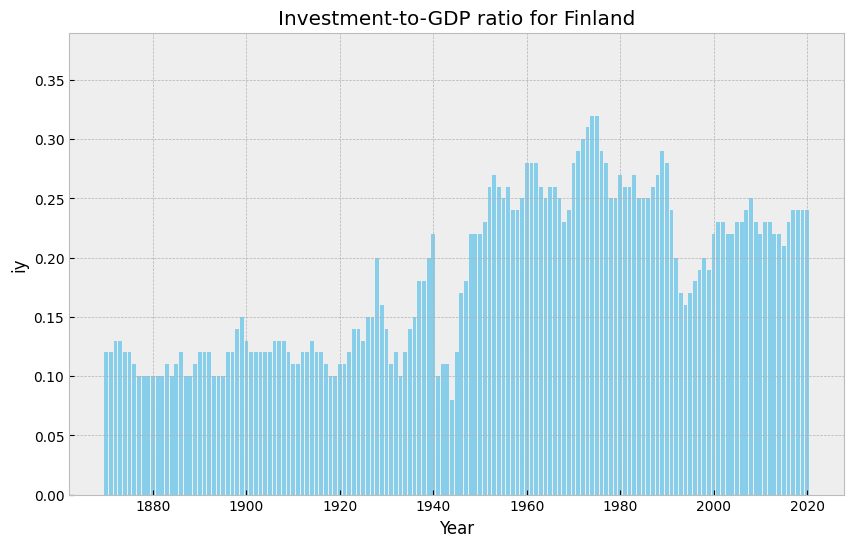

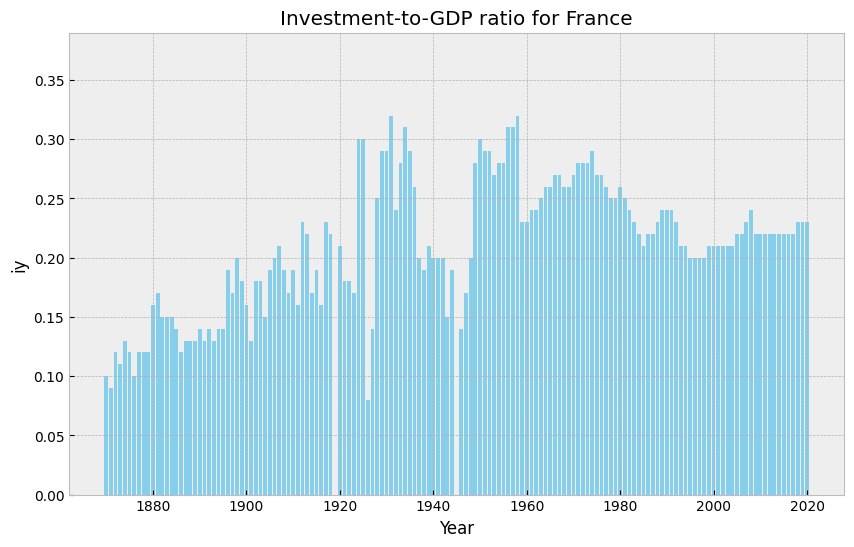

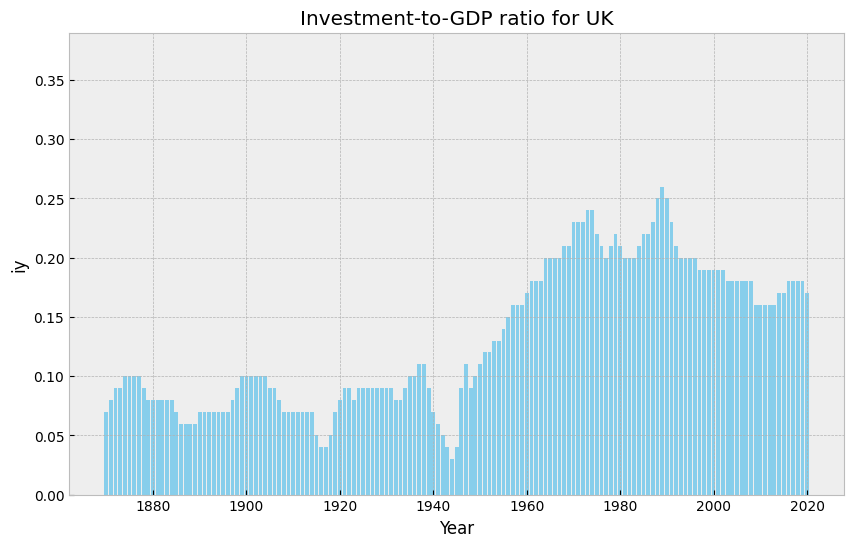

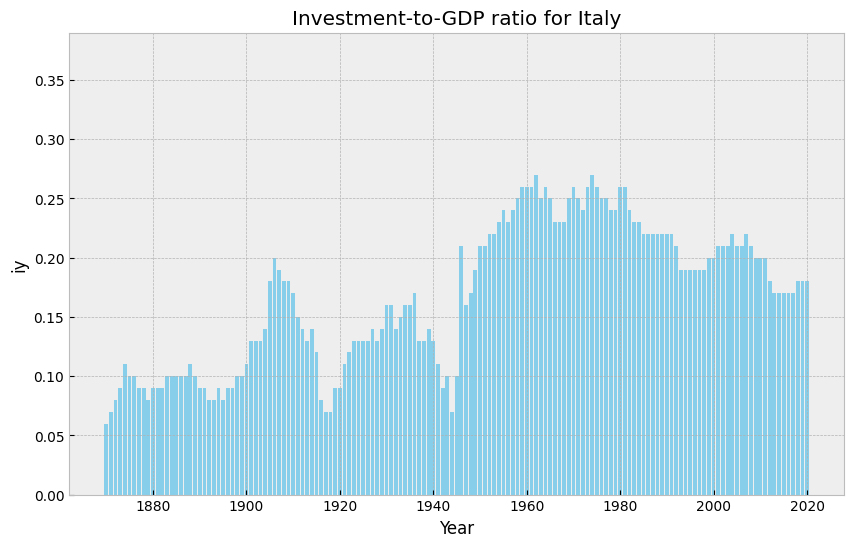

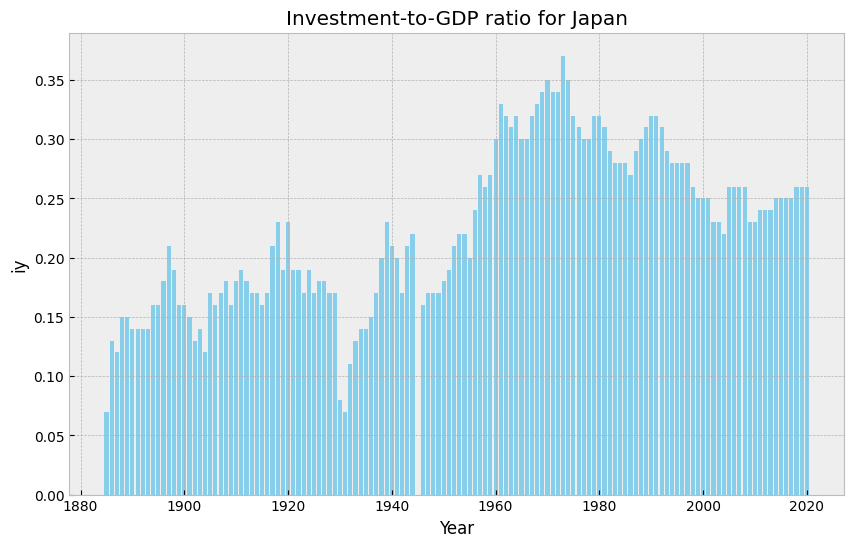

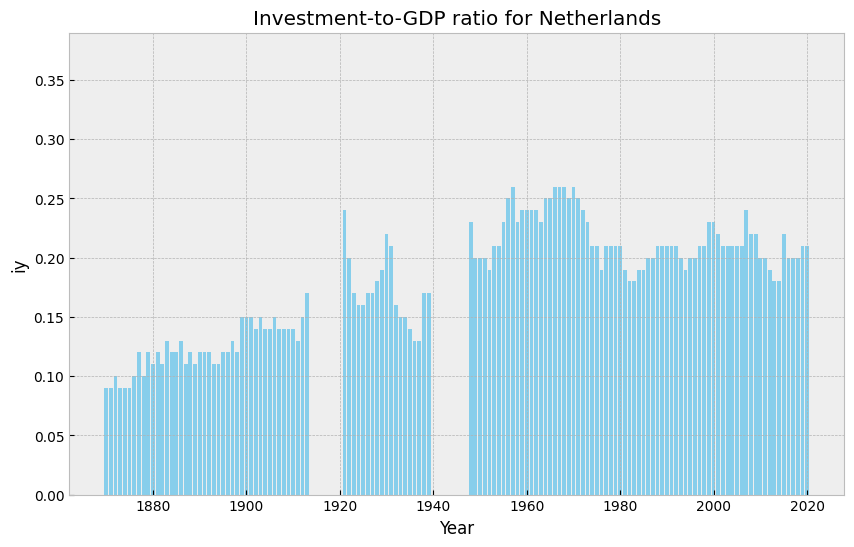

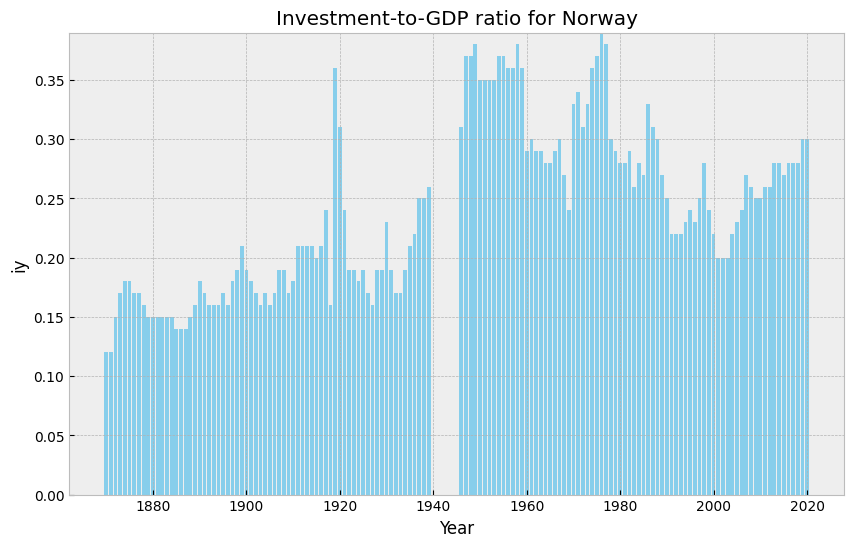

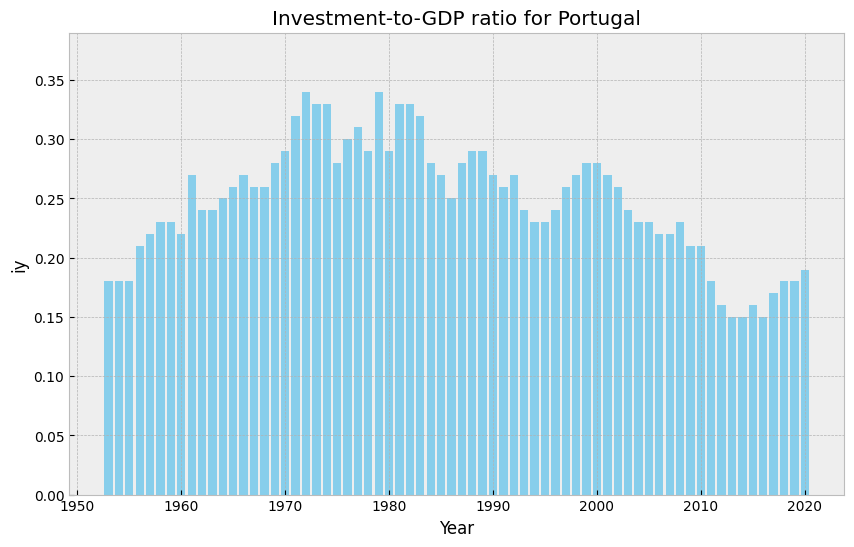

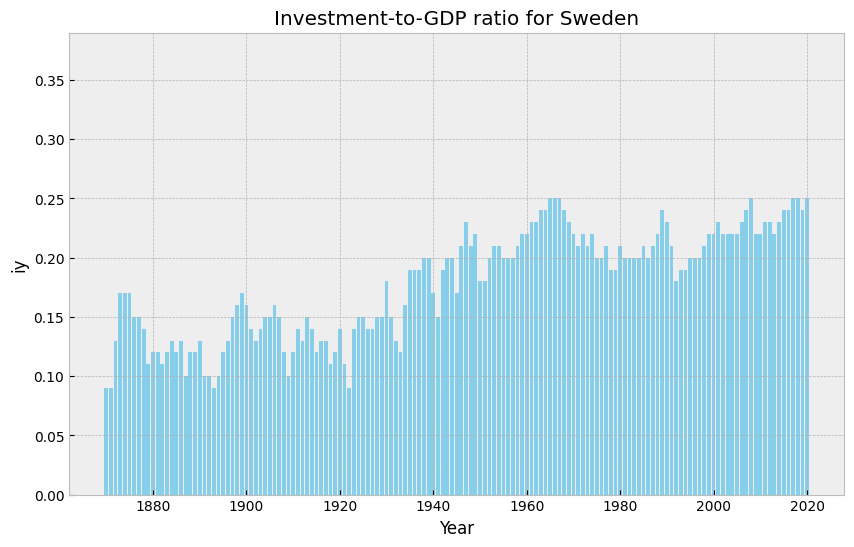

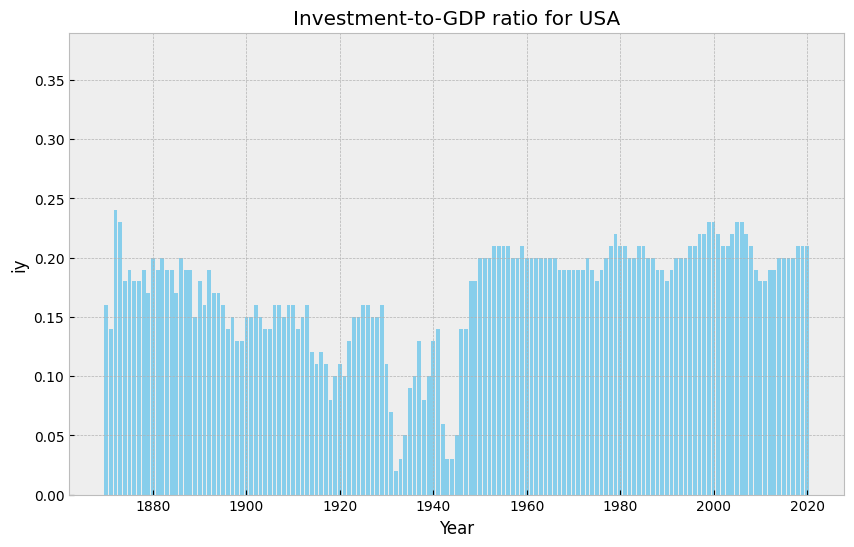

In [12]:
#нарисуем графики-бары для каждой страны
#по оси икс расположены года, по оси игрек значение отношения инвестиций к ВВП
for i in unique_values:
  selected_country = i
  df_selected = data[data['country'] == selected_country]


  plt.figure(figsize=(10, 6))
  plt.bar(df_selected['year'], df_selected['iy'], color='skyblue')
  plt.xlabel('Year')
  plt.ylabel('iy')
  plt.title(f'Investment-to-GDP ratio for {selected_country}')
  plt.ylim(0, data['iy'].max()) #делаем так чтобы масштаб по оси ординат был одинаковым для всех графиков
  plt.show()

Заметим, что у некоторых стран есть пропуски в данных. Мы заполним эти пропуски средним значением для каждой страны по каждому столбцу, чтобы запустить линейную регрессию

In [13]:
#но сначала посмотрим, сколько у нас пропусков в каждом столбце
data.isnull().sum()

year                   0
country                0
ifs                    0
pop                    0
rgdpmad                0
rgdpbarro              0
rconsbarro            89
gdp                   25
iy                   220
cpi                    0
ca                   161
imports               47
exports               47
narrowm               64
money                150
stir                 148
ltrate                36
hpnom                593
unemp                679
wage                  15
debtgdp              177
revenue              103
expenditure           84
xrusd                  3
tloans               191
tmort                317
thh                 1266
tbus                1341
bdebt                775
lev                  214
ltd                  268
noncore              337
crisisJST              0
peg                    0
peg_strict             0
peg_type               0
peg_base             203
JSTtrilemmaIV        502
eq_tr                304
housing_tr           658


In [14]:
#удалим столбцы с нечисловыми значениями, кроме столбца с названием страны
#и заполним средними значениями для каждой страны и для каждого столбца по-отдельности
data = data.drop(columns = ['peg_type', 'peg_base'])
columns_to_fill = data.columns.difference(['country'])

#группируем данных по стране и вычисляем средние значения для каждого столбца
df_means = data.groupby('country')[columns_to_fill].transform('mean')

data[columns_to_fill] = data[columns_to_fill].fillna(df_means)

In [15]:
#еще раз посмотрим, сколько пропусков у нас в каждом столбце
data.isnull().sum()

year                  0
country               0
ifs                   0
pop                   0
rgdpmad               0
rgdpbarro             0
rconsbarro            0
gdp                   0
iy                    0
cpi                   0
ca                    0
imports               0
exports               0
narrowm               0
money                 0
stir                  0
ltrate                0
hpnom                 0
unemp                 0
wage                  0
debtgdp               0
revenue               0
expenditure           0
xrusd                 0
tloans                0
tmort                 0
thh                   0
tbus                  0
bdebt                 0
lev                   0
ltd                   0
noncore               0
crisisJST             0
peg                   0
peg_strict            0
JSTtrilemmaIV         0
eq_tr               151
housing_tr          151
bond_tr             151
bill_rate           151
housing_capgain     151
housing_rent_rtn

Если посмотреть в датасет, то заметим, что эти пропуски остались незаполненными, поскольку нет значений вообще для страны.

Следовательно, эти пропуски не могут заполниться, так как там нет среднего. Заполним тогда эти пропуски средним по столбцу.

In [16]:
#определим, какие столбцы содержат числовые значения и заполним в них пропуски
numeric_columns = data.select_dtypes(include=['number']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

In [17]:
#еще раз посмотрим, сколько пропусков у нас в каждом столбце и ура пропусков больше нет
data.isnull().sum()

year                0
country             0
ifs                 0
pop                 0
rgdpmad             0
rgdpbarro           0
rconsbarro          0
gdp                 0
iy                  0
cpi                 0
ca                  0
imports             0
exports             0
narrowm             0
money               0
stir                0
ltrate              0
hpnom               0
unemp               0
wage                0
debtgdp             0
revenue             0
expenditure         0
xrusd               0
tloans              0
tmort               0
thh                 0
tbus                0
bdebt               0
lev                 0
ltd                 0
noncore             0
crisisJST           0
peg                 0
peg_strict          0
JSTtrilemmaIV       0
eq_tr               0
housing_tr          0
bond_tr             0
bill_rate           0
housing_capgain     0
housing_rent_rtn    0
housing_rent_yd     0
eq_capgain          0
eq_dp               0
bond_rate 

Удалим столбец со страной, чтобы избавиться от нечисловых столбцов (страна будет учитываться в столбце 'ifs')

In [18]:
data = data.drop(columns = ['country'])

Построим матрицу корреляции, как тепловую карту 

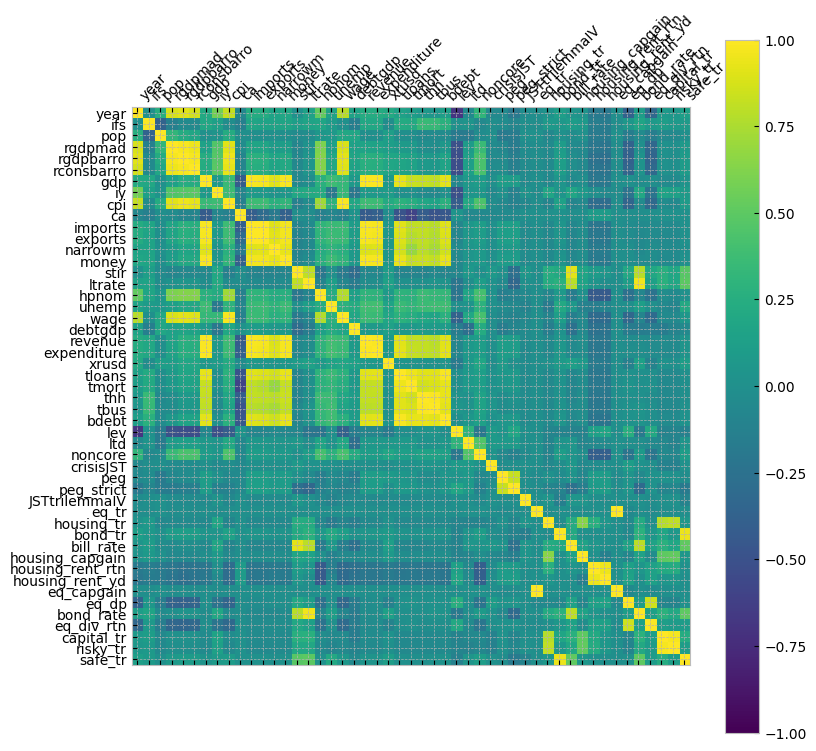

In [19]:
import scipy.stats as ss
fig, ax = plt.subplots(figsize=(9, 9))
img = ax.matshow(data.corr(), vmin=-1, vmax=1)
plt.yticks(range(data.shape[1]), data.columns)
plt.xticks(range(data.shape[1]), data.columns, rotation=45, ha="left" )
plt.colorbar(mappable=img, )
plt.show()

Можем заметить, что довольно много переменных коррелируют друг с другом, что будет плохо сказываться на нашей модели

Оставим только несколько переменных так, чтобы не возникало корреляции 

In [20]:
data = data.drop(columns = ['tbus', 'thh', 'tmort', 'revenue', 'imports', 'exports', 'narrowm', 'rconsbarro', 'bond_rate', 'expenditure', 'cpi', 'tloans', 'housing_tr'])

Ещё раз построим матрицу и посмотрим, что вышло 

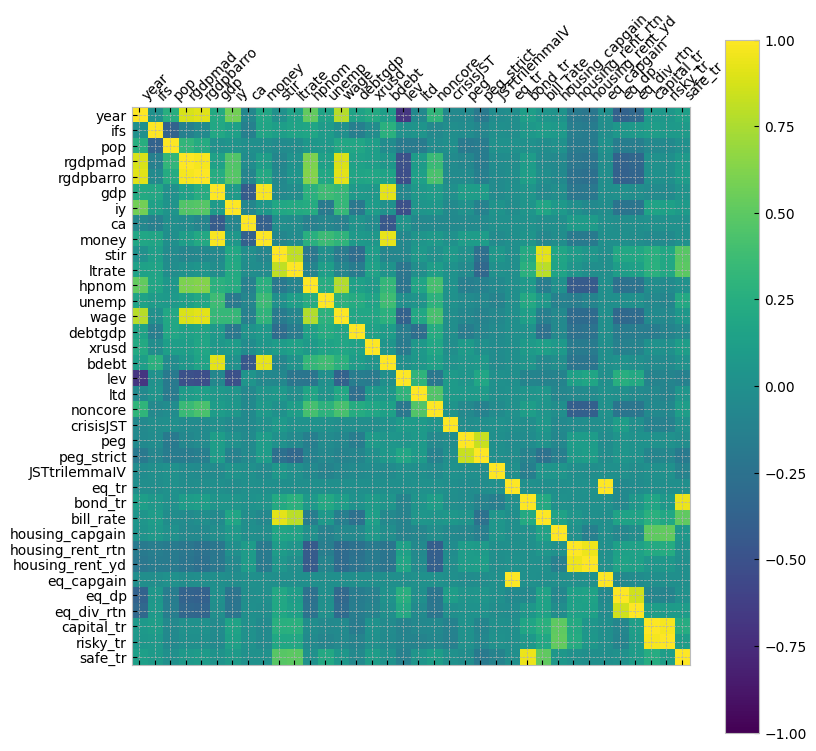

In [21]:
import scipy.stats as ss
# ss.pearsonr(train.Test, train.NameFreq)
fig, ax = plt.subplots(figsize=(9, 9))
img = ax.matshow(data.corr(), vmin=-1, vmax=1)
plt.yticks(range(data.shape[1]), data.columns)
plt.xticks(range(data.shape[1]), data.columns, rotation=45, ha="left" )
plt.colorbar(mappable=img)
plt.show()

Выберем переменную "crisisJST" как таргет

In [22]:
target_variable = 'crisisJST'

X = data.drop(target_variable, axis=1)
y = data[target_variable]

Создадим train и test для будущей модели, поделим датасет 80/20

In [23]:
from sklearn.model_selection import train_test_split

train_size = 0.8
X_train, X_test, y_train, y_test =  train_test_split(X, y, train_size=train_size, random_state=42, shuffle=True)

Создадим регрессию

In [25]:
from sklearn.linear_model import LinearRegression

#запустим линейную регрессию 
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

#предскажем значения по тесту
y_pred = lin_reg.predict(X_test)

Сделаем прогноз значений mpg на тестовом наборе данных:
Оценим производительность модели, вычислив среднеквадратичную ошибку (MSE) и коэффициент детерминации ($R^2$) на тестовом наборе данных.

In [26]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = lin_reg.predict(X_test)
mean_squared_error(y_test, y_pred)

0.030008732921429488

In [27]:
r2_score(y_test, y_pred)

0.061641945447983515

In [28]:
import statsmodels.api as sm
#добавим константу
x_train = sm.add_constant(X_train)

#обучим модель линейной регресси
model = sm.OLS(y_train, X_train).fit()

#выведем саммари
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:              crisisJST   R-squared (uncentered):                   0.111
Model:                            OLS   Adj. R-squared (uncentered):              0.095
Method:                 Least Squares   F-statistic:                              7.169
Date:                Thu, 09 Nov 2023   Prob (F-statistic):                    4.17e-32
Time:                        20:15:42   Log-Likelihood:                          675.31
No. Observations:                2053   AIC:                                     -1281.
Df Residuals:                    2018   BIC:                                     -1084.
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

Все коэффициенты модели ниже:

In [29]:
Betta = np.linalg.inv(X_train.T@X_train)@X_train.T@y_train
Betta

0    -1.519132e-05
1    -1.123050e-04
2     6.124188e-08
3    -2.982390e-06
4     6.351369e-04
5    -1.233731e-09
6    -4.010569e-02
7    -5.740230e-09
8     1.061673e-09
9     1.357941e-02
10   -4.259152e-03
11    1.440158e-04
12   -2.398485e-04
13   -7.074527e-05
14    1.748473e-02
15    2.043448e-06
16   -2.897139e-10
17    7.602971e-04
18    3.614586e-04
19    3.651461e-05
20   -1.969401e-02
21    1.758959e-02
22   -2.315128e-03
23    4.593229e-05
24   -3.069845e-01
25   -7.949331e-01
26   -3.963764e-02
27   -3.252410e-01
28    1.917774e-01
29   -4.782899e-05
30    4.457290e+00
31   -3.670647e+00
32   -3.002249e-03
33   -2.515644e-02
34    6.514199e-01
dtype: float64